In [ ]:
pip install  pylops==1.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.6/158.6 KB 8.4 MB/s eta 0:00:00


In [ ]:
'''
Ce code définit les classes qui vont être utilisées par la suite dans le projet 
'''


#la Classe random contient les fonctions qui simulent les variables aléatoires qui seront utilisée pour étudier les données simulés.
import numpy as np
import pylops
from pylops.optimization.sparsity import ISTA
from pylops.optimization.sparsity import FISTA
print("test")
class random:  
    def matrix_normal(n,p,mu=0,sigma=1):  # n est le nombre de lignes et p le nombre des colonnes, mu est la moyenne et sigma est l'écart type
        return (np.random.randn(n,p)*(sigma**2))+mu
    def vect_normal(n,mu=0,sigma=1):
        return (np.random.randn(n)*(sigma**2))+mu
    def beta(a,s,n): # s et a sont à préciser tel que s= 0,1*p et n> 2*s*log(p/2) pour commencer on peut utilisr a=1
        return a*(np.random.binomial(1,s/n , size=(n,)))
    def outcome(n,p,a,s,mu=0,sigma=1):
        X=random.matrix_normal(n,p,mu,sigma)
        beta=random.beta(a,s,p)
        epsilon=random.vect_normal(n,mu,sigma)
        Y=X @ beta+epsilon
        return Y,X,beta,epsilon


#la classe algo contient les algorithmes qui seront utilisés nottament ISTA et IHT
class algo:
    def ista(X,Y,n,alpha): #pour executer cet algorithme il faut installer la version 1.5 de pylops. Pour ceci on utilise la commande "pip install  pylops==1.5 "
        Op=pylops.MatrixMult(X)
        beta, niter, cost = pylops.optimization.sparsity.ISTA(Op, Y, n, eps=alpha, # n est le nombre maximal d'itération, le vecteur beta contient la solution du problème d'optimisation, et finalement cost represente l'historique de la fonction de coût
                                                        tol=0, returninfo=True) 
        return(beta,niter,cost)
    def fista(X,Y,n,alpha):
        Op=pylops.MatrixMult(X)
        beta, niter, cost = pylops.optimization.sparsity.FISTA(Op, Y, n, eps=alpha,tol=0, returninfo=True)
        return(beta,niter,cost)
    # Hard thresholding function
    def SoftThreshold(x, lamda):
        return np.sign(x) * np.maximum(np.abs(x) - lamda, 0)
    def IHT(x, D, max_iterations=100,lamda=0.01, tol=1e-6):
        m, n = D.shape
        z = np.zeros(n)
        v = x.copy()
        J = []
        for i in range(max_iterations):
            z_new = algo.SoftThreshold(D.T @ v + z, lamda)
            v = x - D @ z_new
            if np.linalg.norm(z_new - z) < tol:
                break
            z = z_new.copy()
            J.append(0.5 * np.linalg.norm(x - D @ z_new)**2 + lamda * np.linalg.norm(z_new, ord=1))
        return z,J

test


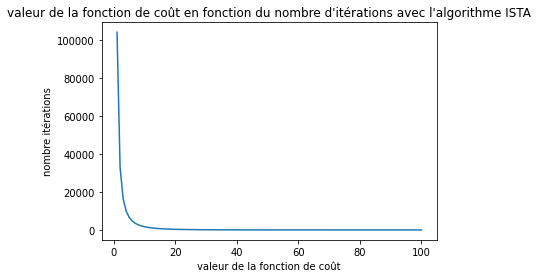

In [ ]:
from math import log
import matplotlib.pyplot as plt
import numpy

Y,X,beta,epsilon=random.outcome(1000,2000,1,0.1*2000)
n=Y.shape

n=100
alpha= numpy.linspace(0,0.1,100)

#betahat_1,nbr_it,cost_1=algo.ista(X,Y,1000,4*((log(2000)**(1/2))))

for k in alpha: 
  betahat_1,nbr_it_1,cost_1=algo.ista(X,Y,n,k)
  nbr_it = list(range(1,n+1))
plt.title("valeur de la fonction de coût en fonction du nombre d'itérations avec l'algorithme ISTA")  # Titre du graphique
plt.ylabel('nombre itérations')  # Titre de l'axe y
plt.xlabel('valeur de la fonction de coût')
plt.plot(nbr_it,cost_1)

#ce graphique représente la vitesse de convergence en fonction du nombre d'itération de la fonction de coût de l'algorithme ISTA

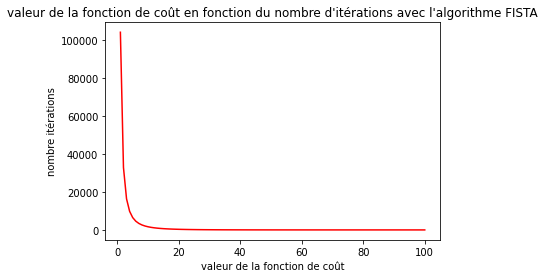

In [ ]:
#voici le même graphique appliqué à l'algorithme FISTA
n=100
alpha= numpy.linspace(0,0.1,100)

for k in alpha: 
  betahat_2,nbr_it_2,cost_2=algo.fista(X,Y,n,k)
  nbr_it2 = list(range(1,n+1))

plt.title("valeur de la fonction de coût en fonction du nombre d'itérations avec l'algorithme FISTA")
plt.ylabel('nombre itérations')  # Titre de l'axe y
plt.xlabel('valeur de la fonction de coût')
plt.plot(nbr_it2,cost_1,color='red')

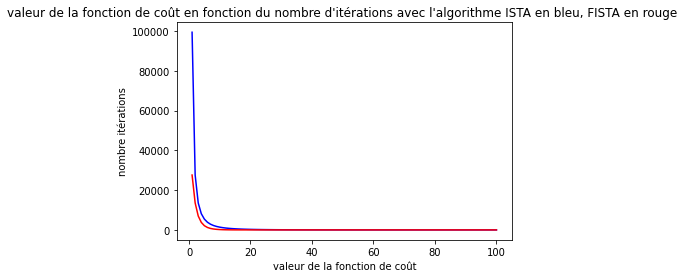

In [ ]:
#graphiques superposés


from math import log
import matplotlib.pyplot as plt
import numpy

Y,X,beta,epsilon=random.outcome(1000,2000,1,0.1*2000)
n=Y.shape

n=100
alpha= numpy.linspace(0,0.1,100)

#betahat_1,nbr_it,cost_1=algo.ista(X,Y,1000,4*((log(2000)**(1/2))))

for k in alpha: 
  betahat_1,nbr_it_1,cost_1=algo.ista(X,Y,n,k)
  betahat_2,nbr_it_2,cost_2=algo.fista(X,Y,n,k)
  nbr_it = list(range(1,n+1))

plt.ylabel('nombre itérations')  # Titre de l'axe y
plt.xlabel('valeur de la fonction de coût')
plt.title("valeur de la fonction de coût en fonction du nombre d'itérations avec l'algorithme ISTA en bleu, FISTA en rouge ")
plt.plot(nbr_it,cost_1, color='blue')
plt.plot(nbr_it,cost_2, color='red')


#ici nous remarquons bien que l'algorithme FISTA est plus performant que l'algorithme ISTA 
#la fonction de coût décroît plus rapidement pour l'algorithme FISTA que pour l'algorithme ISTA

In [ ]:
#tentons le calcul du coefficient de Pearson
x=cost_1
y=cost_2
from scipy.stats import pearsonr
coeff_pearson,_ = pearsonr(x,y)
print("le pourcentage de corrélation entre .... : {}".format(coeff_pearson))

#97% de pourcentage de corrélation c'est énorme haha, cela signifie que les deux fonctions de coût de l'algorithme ISTA et FISTA sont quasiment équivalentes
#le calcul de la pente nous permet de montrer que la valeur ajoutée de FISTA est sur la vitesse de convergence
#je ne suis pas bien sûr de ce qu'on peut en faire mais je vais continuer à creuser

le pourcentage de corrélation entre .... : 0.9776553681192128


In [ ]:
#on peut faire un t-test aussi pour vérifier si ces 2 séries temporelles ont de fortes différences
#à valider avec Ilyes et Aziz

#calculons le slope des séries temporelles

slopeISTA = np.polyfit(nbr_it,cost_1,1)[0]
print('la pente de la fonction de coût générée par ISTA vaut', slopeISTA)


slopeFISTA = np.polyfit(nbr_it,cost_2,1)[0]
print( 'la pente de la fonction de coût générée par ISTA vaut', slopeFISTA)

#donc l'algorithme FISTA converge bien plus rapidement que l'algorithme FISTA puisque sa pente est plus grande 

la pente de la fonction de coût générée par ISTA vaut -99.58810855640183
la pente de la fonction de coût générée par ISTA vaut -33.17271052184974
